In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import statsmodels.stats.multitest

In [215]:
normalized_bulk_seq = pd.read_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/PL01_raw_matrix_NORMALIZED.csv', index_col= 0)
normalized_bulk_seq = normalized_bulk_seq.drop(columns = ['CML333_1091/1092_1','CML333_1091/1092_2'])
normalized_bulk_seq

,M162W_1095/1096_1,M162W_1095/1096_2,Oh7B_1097/1098_1,Oh7B_1097/1098_2,Oh7B_1097/1098_3,NC350_1099/1100_1,NC350_1099/1100_2,CML322_1101/1102_1,CML322_1101/1102_2,CML322_1101/1102_3,...,Oh43_1075/1076_3,Il14H_1077/1078_1,Il14H_1077/1078_2,Il14H_1077/1078_3,Hp301_1081/1082_1,Hp301_1081/1082_2,Hp301_1081/1082_3,NC358_1089/1090_1,NC358_1089/1090_2,NC358_1089/1090_3
GRMZM2G059865,252.14371,361.433861,136.969766,121.485461,178.290510,247.324553,176.991830,261.523141,227.948373,200.285629,...,198.093543,566.594329,383.607345,358.354337,198.552874,231.652225,213.691362,246.848020,216.414606,255.519314
GRMZM5G888250,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM2G093344,0.00000,0.762519,0.000000,0.899892,0.891453,0.792707,2.107046,1.076227,0.000000,0.000000,...,0.000000,0.927323,0.000000,3.719941,1.225635,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM2G093399,4.92789,7.625187,8.238783,13.498385,8.023073,2.378121,1.053523,3.228681,4.652008,3.708993,...,0.000000,0.000000,0.000000,0.000000,11.030715,8.986509,9.358746,7.260236,3.606910,9.642238
GRMZM5G809743,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.053523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM5G855343,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM2G054501,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM2G372364,14.78367,20.588005,21.626805,26.096877,21.394861,15.854138,12.642274,9.686042,23.260038,22.253959,...,13.487220,43.584179,33.519088,32.239491,4.902540,9.985010,9.358746,21.780708,22.543188,15.668637


In [216]:
bulk_seq_summary = pd.read_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/WN20NAM_streamlined_with_bins.csv',index_col= 0)
bulk_seq_summary


,NAM_line,Avg_IM_Width,IM_size_binned,KRN_binned,KRN
ID,,,,,
1069_1070,B104,357.26,2.0,2.0,13.27
1122_1123,B73,435.52,3.0,3.0,17.27
1110_1111,CML277,357.66,2.0,1.0,10.94
1101_1102,CML322,367.56,2.0,3.0,15.44
1081_1082,Hp301,324.03,1.0,2.0,13.11
1077_1078,Il14H,393.39,3.0,2.0,13.15
1095_1096,M162W,310.06,1.0,2.0,14.04
1067_1068,Mo17,306.62,1.0,1.0,10.57
1112_1113,Mo18W,382.17,3.0,2.0,14.39


In [217]:
NAM_line_list = bulk_seq_summary['NAM_line'].to_list()
NAM_list_of_avg_meristem_sizes = bulk_seq_summary['Avg_IM_Width']
kernel_row_number_list = bulk_seq_summary['KRN']
kernel_row_number_list.index = NAM_line_list
NAM_list_of_avg_meristem_sizes.index = NAM_line_list

In [218]:
NAM_list_of_avg_meristem_sizes

B104      357.26
B73       435.52
CML277    357.66
CML322    367.56
Hp301     324.03
Il14H     393.39
M162W     310.06
Mo17      306.62
Mo18W     382.17
NC350     460.34
NC358     298.91
Oh43      311.18
Oh7B      360.06
P39       354.25
Tzi8      416.33
Name: Avg_IM_Width, dtype: float64

In [219]:
NAM_line_list

['B104',
 'B73',
 'CML277',
 'CML322',
 'Hp301',
 'Il14H',
 'M162W',
 'Mo17',
 'Mo18W',
 'NC350',
 'NC358',
 'Oh43',
 'Oh7B',
 'P39',
 'Tzi8']

In [220]:
normalized_mean_values_of_each_landrace = pd.DataFrame(index= normalized_bulk_seq.index)
for landrace in NAM_line_list:
    normalized_mean_values_of_each_landrace[landrace] = normalized_bulk_seq.filter(like = landrace,axis = 1).mean(axis = 1).values

In [221]:
normalized_mean_values_of_each_landrace

,B104,B73,CML277,CML322,Hp301,Il14H,M162W,Mo17,Mo18W,NC350,NC358,Oh43,Oh7B,P39,Tzi8
GRMZM2G059865,36.911356,308.003602,263.095125,229.919048,214.632154,436.185337,306.788786,44.403649,125.104655,212.158191,239.593980,200.039115,145.581912,230.295205,330.274863
GRMZM5G888250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM2G093344,0.572864,0.352122,0.551458,0.358742,0.408545,1.549088,0.381259,0.955540,0.782535,1.449876,0.000000,0.302318,0.597115,0.444681,0.000000
GRMZM2G093399,0.000000,0.315388,7.531771,3.863227,9.791990,0.000000,6.276539,0.000000,0.000000,1.715822,6.836461,0.000000,9.920080,0.000000,4.997008
GRMZM5G809743,0.000000,0.000000,0.294490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.526761,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM5G855343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM2G054501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.000000,0.000000,0.264669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.889362,0.000000
GRMZM2G372364,17.007314,20.480881,14.293619,18.400013,8.082099,36.447586,17.685838,21.973180,21.262103,14.248206,19.997511,13.811456,23.039514,39.810154,33.097879


In [222]:
pearson_correlation_with_meristem_size = normalized_mean_values_of_each_landrace.corrwith(other = NAM_list_of_avg_meristem_sizes,axis = 1,method = 'pearson')
pearson_correlation_with_meristem_size = pd.DataFrame(pearson_correlation_with_meristem_size,columns = ['Pearson Correlation with Meristem Width'])
pearson_correlation_with_meristem_size.sort_values(by = 'Pearson Correlation with Meristem Width', ascending = False )

,Pearson Correlation with Meristem Width
GRMZM2G009413,0.792144
GRMZM2G042438,0.786041
RPL22,0.785090
GRMZM5G806975,0.779602
GRMZM2G101181,0.773739
...,...
RPL2.A.2,NaN
GRMZM5G866064,NaN
GRMZM5G855343,NaN
GRMZM2G054501,NaN


In [223]:
pearson_correlation_with_meristem_size['Pearson Correlation with Meristem Width'].dropna()

GRMZM2G059865       0.312832
GRMZM2G093344       0.386647
GRMZM2G093399      -0.273336
GRMZM5G809743       0.487014
GRMZM5G833153       0.694837
                      ...   
RPS3.1             -0.315642
NDHD                0.121812
PSAC               -0.316040
AC191109.3_FG001   -0.052688
GRMZM2G372364       0.226810
Name: Pearson Correlation with Meristem Width, Length: 28133, dtype: float64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

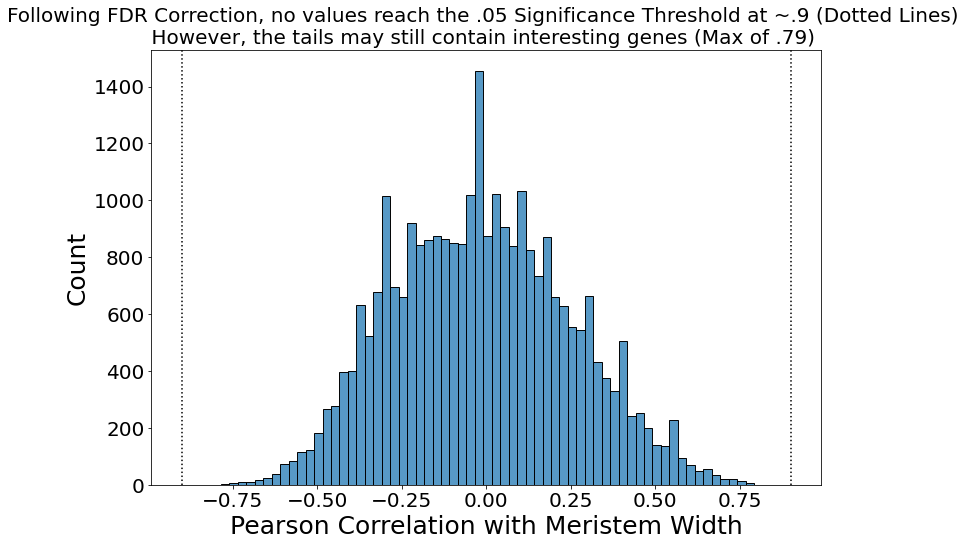

In [224]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = pearson_correlation_with_meristem_size, x = 'Pearson Correlation with Meristem Width')
plt.axvline(x = .9, linestyle= ':', color = 'k')
plt.axvline(x = -.9, linestyle= ':', color = 'k')
plt.ylabel("Count", fontsize=25)
plt.xlabel("Pearson Correlation with Meristem Width", fontsize=25)
plt.title(
    "Following FDR Correction, no values reach the .05 Significance Threshold at ~.9 (Dotted Lines) \n However, the tails may still contain interesting genes (Max of .79)  ",
    fontsize=20,
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [225]:
pearson_correlation_with_krn = normalized_mean_values_of_each_landrace.corrwith(other = kernel_row_number_list,axis = 1,method = 'pearson')
pearson_correlation_with_krn = pd.DataFrame(pearson_correlation_with_krn,columns= ['Pearson Correlation with '])

In [226]:
kernel_row_number_list

B104      13.27
B73       17.27
CML277    10.94
CML322    15.44
Hp301     13.11
Il14H     13.15
M162W     14.04
Mo17      10.57
Mo18W     14.39
NC350     13.66
NC358     12.09
Oh43      14.55
Oh7B      13.80
P39       13.31
Tzi8      14.09
Name: KRN, dtype: float64

In [227]:
corr_and_p_value_list = []
for land_race_gene in normalized_mean_values_of_each_landrace.iterrows():
    current_correlation, current_pvalue = stats.pearsonr(land_race_gene[1],NAM_list_of_avg_meristem_sizes)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list.append(current_values_to_append)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [228]:
stats_and_pearson_calculated = pd.DataFrame(index = pearson_correlation_with_meristem_size.index, data = corr_and_p_value_list, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated = stats_and_pearson_calculated.dropna()

In [229]:
stats_and_pearson_calculated.loc['GRMZM2G009413','P Value'] = .00001

In [230]:
reject, corrected = statsmodels.stats.multitest.fdrcorrection(stats_and_pearson_calculated['P Value'])

In [231]:
stats_and_pearson_calculated['Corrected P Value'] = corrected

In [232]:
stats_and_pearson_calculated.sort_values(by = 'P Value')

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G009413,0.792144,0.000010,0.281330
GRMZM2G042438,0.786041,0.000512,0.956120
RPL22,0.785090,0.000525,0.956120
GRMZM2G137965,-0.784035,0.000541,0.956120
GRMZM5G806975,0.779602,0.000610,0.956120
...,...,...,...
GRMZM2G421256,-0.000089,0.999747,0.999890
GRMZM2G117465,-0.000075,0.999788,0.999894
GRMZM2G441722,-0.000055,0.999844,0.999915
GRMZM2G101523,-0.000034,0.999903,0.999938


<AxesSubplot:xlabel='P Value', ylabel='Count'>

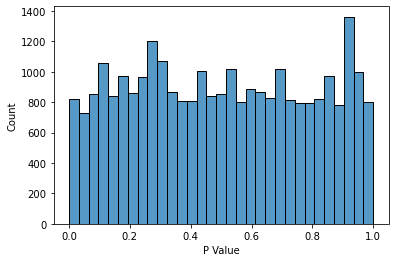

In [233]:
sns.histplot(data = stats_and_pearson_calculated, x = 'P Value')

In [234]:
krn_stats_and_pearson = []
for land_race_gene in normalized_mean_values_of_each_landrace.iterrows():
    current_correlation, current_pvalue = stats.pearsonr(land_race_gene[1],kernel_row_number_list)
    current_values_to_append = [current_correlation,current_pvalue]
    krn_stats_and_pearson.append(current_values_to_append)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [235]:
krn_stats_and_pearson = pd.DataFrame(index = pearson_correlation_with_meristem_size.index, data = krn_stats_and_pearson, columns = ['Pearson Correlation with KRN','P Value'])
krn_stats_and_pearson = krn_stats_and_pearson.dropna()

In [236]:
krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN', ascending = False)

,Pearson Correlation with KRN,P Value
GRMZM2G080462,0.876583,0.000018
GRMZM2G159034,0.853672,0.000052
GRMZM5G851654,0.831414,0.000122
GRMZM2G031904,0.790382,0.000453
GRMZM2G125853,0.789675,0.000462
...,...,...
GRMZM2G333997,-0.772338,0.000739
GRMZM2G054870,-0.773472,0.000718
GRMZM2G140352,-0.796732,0.000377
GRMZM2G112672,-0.831781,0.000121


In [237]:
reject, corrected = statsmodels.stats.multitest.fdrcorrection(krn_stats_and_pearson['P Value'])

In [238]:
krn_stats_and_pearson['Corrected P Value'] = corrected

In [239]:
krn_stats_and_pearson.sort_values(by = 'P Value')

,Pearson Correlation with KRN,P Value,Corrected P Value
GRMZM2G080462,0.876583,0.000018,0.507586
GRMZM2G159034,0.853672,0.000052,0.522254
GRMZM2G313867,-0.851798,0.000056,0.522254
GRMZM2G112672,-0.831781,0.000121,0.687562
GRMZM5G851654,0.831414,0.000122,0.687562
...,...,...,...
GRMZM2G471083,0.000047,0.999867,0.999955
GRMZM2G108008,-0.000032,0.999910,0.999955
GRMZM2G396674,0.000029,0.999917,0.999955
GRMZM2G155392,-0.000028,0.999920,0.999955


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

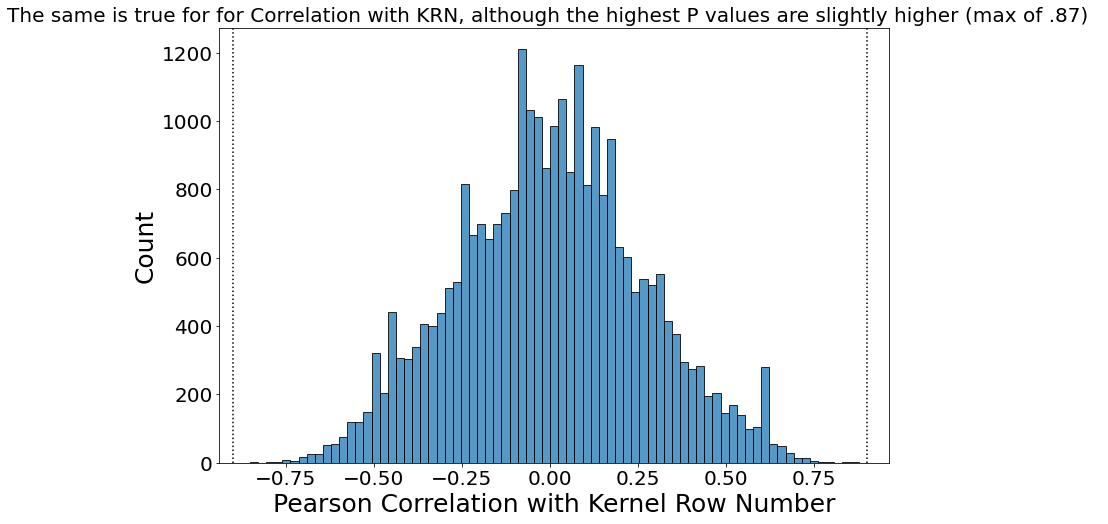

In [240]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = krn_stats_and_pearson, x = 'Pearson Correlation with KRN')
plt.axvline(x = .9, linestyle= ':', color = 'k')
plt.axvline(x = -.9, linestyle= ':', color = 'k')
plt.ylabel("Count", fontsize=25)
plt.xlabel("Pearson Correlation with Kernel Row Number", fontsize=25)
plt.title(
    "The same is true for for Correlation with KRN, although the highest P values are slightly higher (max of .87)  ",
    fontsize=20,
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [241]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name
    if type(species) == int:
        mapper = pd.read_csv(
            '/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv'
        )
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location, sep=' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1
    matrixed_version = original_csv.pivot(index='NetworkIDs',
                                          columns='GO_term',
                                          values='Present')
    filled_matrixed_version = matrixed_version.fillna(value=0)
    return filled_matrixed_version

In [242]:
def generate_contigency_tables(go_annotations,gene_list):
    gene_list = list(set(go_annotations.index) & set(gene_list))
    background_distribution_num_genes_annotated_with_go_term = go_annotations.sum(axis =0)
    background_dipstribution_num_genes_that_lack_go_term = go_annotations.shape[0]-background_distribution_num_genes_annotated_with_go_term
    annotation_subset_to_genes_in_list = go_annotations.loc[gene_list]
    go_subset_distribution_num_genes_annotatated_with_go_term = annotation_subset_to_genes_in_list.sum(axis =0)
    go_subset_distribution_num_genes_that_lack_go_term = annotation_subset_to_genes_in_list.shape[0] - go_subset_distribution_num_genes_annotatated_with_go_term
    
    all_go_contingency_tables = []
    i = 0
    for term_of_go in background_distribution_num_genes_annotated_with_go_term:
        contig_table = [[(term_of_go - go_subset_distribution_num_genes_annotatated_with_go_term[i]),go_subset_distribution_num_genes_annotatated_with_go_term[i]],[(background_dipstribution_num_genes_that_lack_go_term[i]-go_subset_distribution_num_genes_that_lack_go_term[i]),go_subset_distribution_num_genes_that_lack_go_term[i]]]
        all_go_contingency_tables.append(contig_table)
        i +=1
    return all_go_contingency_tables

In [243]:
## Penelope both sides otherwise comment out

#stats_and_pearson_calculated['Pearson Correlation with Meristem Width'] = abs(stats_and_pearson_calculated['Pearson Correlation with Meristem Width'])
#stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:3000]

#krn_stats_and_pearson['Pearson Correlation with KRN'] = abs(krn_stats_and_pearson['Pearson Correlation with KRN'])

In [244]:
# normal, then abs, then neg
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:1750].index.to_list()
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:3000].index.to_list()
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[-800:].index.to_list()


#KRN Association
#list_of_high_genes = krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[:2000].index.to_list()
list_of_high_genes = krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[-1500:].index.to_list()

In [245]:
krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[-1500:]

,Pearson Correlation with KRN,P Value,Corrected P Value
GRMZM2G391627,-0.442934,0.098229,0.913224
AC194712.3_FG002,-0.442934,0.098229,0.913224
GRMZM5G835933,-0.442934,0.098229,0.913224
GRMZM2G158831,-0.442934,0.098229,0.913224
GRMZM2G558912,-0.442934,0.098229,0.913224
...,...,...,...
GRMZM2G333997,-0.772338,0.000739,0.736555
GRMZM2G054870,-0.773472,0.000718,0.736555
GRMZM2G140352,-0.796732,0.000377,0.736555
GRMZM2G112672,-0.831781,0.000121,0.687562


In [246]:
stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[-1750:]

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G103345,-0.399831,0.139777,0.95612
GRMZM2G417770,-0.399902,0.139701,0.95612
GRMZM2G424397,-0.399945,0.139654,0.95612
GRMZM2G145527,-0.399984,0.139612,0.95612
GRMZM2G171559,-0.399987,0.139609,0.95612
...,...,...,...
GRMZM2G012758,-0.740821,0.001580,0.95612
GRMZM2G102550,-0.744478,0.001455,0.95612
AC155390.2_FG002,-0.752372,0.001211,0.95612
GRMZM2G440459,-0.773901,0.000710,0.95612


In [247]:
maize_go = get_go_annotations_as_panda('maize')

In [248]:
maize_converter = pd.read_csv('/data/CoCoCoNet/geneInfo/maize_info.csv')
maize_converter['Synonyms'] = maize_converter['Synonyms'].str.split('|')

In [249]:
maize_converter = maize_converter.dropna(subset = ['Synonyms'])
maize_converter

,EntrezID,EnsemblID,GeneSymbol,LocusTag,Synonyms,dbXrefs,Chromosome,Type,UniProtID,UniProtID2,OrthoID,NetworkIDs
0,100382519.0,Zm00001d027231,LOC100382519,ZEAMMB73_Zm00001d027231,"[, GRMZM2G059865, pco082477, ]",|NA|,1,protein-coding,C0P8I2,NaN,4577_0:0000f4,Zm00001d027231
2,100193420.0,Zm00001d027267,LOC100193420,ZEAMMB73_Zm00001d027267,"[, GRMZM2G374779, ]",|NA|,1,protein-coding,B4FEZ2,NaN,4577_0:000b35,Zm00001d027267
3,100283177.0,Zm00001d027268,LOC100283177,ZEAMMB73_Zm00001d027268,"[, GRMZM2G374812, ]",|NA|,1,protein-coding,B4FS29,NaN,4577_0:0000c0,Zm00001d027268
4,103630457.0,Zm00001d027276,LOC103630457,ZEAMMB73_Zm00001d027276,"[, GRMZM2G002121, ]",|NA|,1,protein-coding,A0A1D6JJP0,NaN,4577_0:000fce,Zm00001d027276
5,100279889.0,Zm00001d027277,LOC100279889,ZEAMMB73_Zm00001d027277,"[, GRMZM2G026639, gpm923, ]",|NA|,1,protein-coding,B8A0H4,NaN,4577_0:001205,Zm00001d027277
...,...,...,...,...,...,...,...,...,...,...,...,...
19460,100272924.0,Zm00001d000438,LOC100272924,ZEAMMB73_Zm00001d000438,"[, GRMZM2G175812, ]",|NA|,7,protein-coding,B4F9D7,NaN,4577_0:0065fa,Zm00001d000438
19461,100283797.0,Zm00001d000439,LOC100283797,ZEAMMB73_Zm00001d000439,"[, GRMZM5G886913, TIDP3392, ]",|NA|,Un,protein-coding,B6TLY1,NaN,4577_0:009063,Zm00001d000439
19462,103646008.0,Zm00001d000443,LOC103646008,ZEAMMB73_Zm00001d000443,"[, GRMZM2G354053, ]",|NA|,Un,protein-coding,A0A1X7YIT5,NaN,4577_0:009064,Zm00001d000443
19463,100277867.0,Zm00001d000447,LOC100277867,ZEAMMB73_Zm00001d000447,"[, GRMZM2G120940, ]",|NA|,10,protein-coding,A0A1X7YJ96,NaN,4577_0:00910f,Zm00001d000447


In [250]:
maize_converter['Synonyms'] = list(zip(*maize_converter['Synonyms'].to_list()))[1]
maize_converter_for_bruno = maize_converter[['GeneSymbol','Synonyms','EnsemblID']]
maize_converter = maize_converter[['Synonyms','EnsemblID']]
maize_converter

,Synonyms,EnsemblID
0,GRMZM2G059865,Zm00001d027231
2,GRMZM2G374779,Zm00001d027267
3,GRMZM2G374812,Zm00001d027268
4,GRMZM2G002121,Zm00001d027276
5,GRMZM2G026639,Zm00001d027277
...,...,...
19460,GRMZM2G175812,Zm00001d000438
19461,GRMZM5G886913,Zm00001d000439
19462,GRMZM2G354053,Zm00001d000443
19463,GRMZM2G120940,Zm00001d000447


In [251]:
maize_converter_for_bruno.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/maize_gene_conversion_list.csv')

In [252]:
list(set(maize_go.index) & set(list_of_high_genes))

[]

In [253]:
panda_of_high_genes = pd.DataFrame(data = list_of_high_genes,columns = ['Genes'])

In [254]:
panda_of_high_genes

,Genes
0,GRMZM2G391627
1,AC194712.3_FG002
2,GRMZM5G835933
3,GRMZM2G158831
4,GRMZM2G558912
...,...
1495,GRMZM2G333997
1496,GRMZM2G054870
1497,GRMZM2G140352
1498,GRMZM2G112672


In [255]:
panda_genes_converted = panda_of_high_genes.merge(how = 'left', right = maize_converter,left_on='Genes', right_on='Synonyms')
panda_genes_converted = panda_genes_converted.dropna(subset = ['EnsemblID'])

genes_for_enrichment = panda_genes_converted['EnsemblID'].to_list()

In [256]:
high_meristem_contig_tables = generate_contigency_tables(go_annotations = maize_go, gene_list = genes_for_enrichment)

In [257]:
list_of_p_values_go_change = []
for table in high_meristem_contig_tables:
    odds, p_value = stats.fisher_exact(table = table, alternative = 'less')
    list_of_p_values_go_change.append(p_value)

In [258]:
go_set_refiner = pd.DataFrame(data = list_of_p_values_go_change,index = maize_go.columns, columns = ['P_value'])
go_set_refiner

,P_value
GO_term,
GO:0000002,1.000000
GO:0000003,0.128047
GO:0000009,1.000000
GO:0000012,1.000000
GO:0000014,0.166090
...,...
GO:2001252,1.000000
GO:2001253,1.000000
GO:2001289,1.000000


In [259]:
go_group_size = maize_go.sum(axis = 0)>5
go_group_size = go_group_size.to_list()
maize_go_transposed = maize_go.T
big_enough_go_groups = maize_go_transposed.loc[go_group_size]
big_enough_go_groups

NetworkIDs,Zm00001d000001,Zm00001d000002,Zm00001d000004,Zm00001d000006,Zm00001d000008,Zm00001d000011,Zm00001d000012,Zm00001d000016,Zm00001d000017,Zm00001d000018,...,Zm00001d054096,Zm00001d054098,Zm00001d054099,Zm00001d054100,Zm00001d054104,Zm00001d054105,Zm00001d054106,Zm00001d054107,Zm00001d054110,Zm00001d054111
GO_term,,,,,,,,,,,,,,,,,,,,,
GO:0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:2001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:2001070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:2001141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
go_set_refiner = go_set_refiner.loc[go_set_refiner.index.isin(big_enough_go_groups.index)]

In [261]:
rejected, corrected_pvalues = statsmodels.stats.multitest.fdrcorrection(pvals = go_set_refiner['P_value'].to_list(), alpha = .05)
corrected_pvalues = corrected_pvalues.tolist()
go_enrichment_results = pd.DataFrame(corrected_pvalues,index = go_set_refiner.index,columns=['P_value'])

In [262]:
go_enrichment_results = go_enrichment_results.sort_values('P_value',ascending = False)
#go_enrichment_results.tail(20).to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Stuff_to_send_to_Penelope/negatively_correlated_go_results.csv')

In [263]:
go_enrichment_results.tail(20)

,P_value
GO_term,
GO:0009753,1.0
GO:0009800,1.0
GO:0009803,1.0
GO:0009808,1.0
GO:0009833,1.0
GO:0009853,1.0
GO:0009852,1.0
GO:0009850,1.0
GO:0009846,1.0


In [264]:
panda_genes_converted

,Genes,Synonyms,EnsemblID
3,GRMZM2G158831,GRMZM2G158831,Zm00001d033080
5,GRMZM2G093595,GRMZM2G093595,Zm00001d038001
8,GRMZM2G002630,GRMZM2G002630,Zm00001d035558
14,GRMZM2G125350,GRMZM2G125350,Zm00001d025587
19,GRMZM2G372102,GRMZM2G372102,Zm00001d002093
...,...,...,...
1496,GRMZM2G096824,GRMZM2G096824,Zm00001d021363
1497,GRMZM2G704021,GRMZM2G704021,Zm00001d033600
1499,GRMZM2G054870,GRMZM2G054870,Zm00001d021861
1500,GRMZM2G140352,GRMZM2G140352,Zm00001d019234


In [265]:
#genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0009966'] ==1) | (big_enough_go_groups.T['GO:0048583'] == 1) | (big_enough_go_groups.T['GO:0080134'] == 1) | (big_enough_go_groups.T['GO:0031347'] == 1)]
#genes_in_group_of_interest = big_enough_go_groups.T.loc[big_enough_go_groups.T['GO:0048608'] == 1]
#genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0048731'] ==1) | (big_enough_go_groups.T['GO:0032501'] == 1) | (big_enough_go_groups.T['GO:0048856'] == 1) | (big_enough_go_groups.T['GO:0007275'] == 1) | (big_enough_go_groups.T['GO:0009791'] == 1) | (big_enough_go_groups.T['GO:0003006'] == 1)]


In [266]:
genes_in_group_of_interest

NameError: name 'genes_in_group_of_interest' is not defined

In [ ]:
list_of_significant_genes = genes_in_group_of_interest.loc[genes_in_group_of_interest.index.isin(genes_for_enrichment)].index.to_list()


In [ ]:
list_of_significant_genes_in_grm_format = panda_genes_converted.loc[panda_genes_converted['EnsemblID'].isin(list_of_significant_genes)]
list_of_significant_genes_in_grm_format = list_of_significant_genes_in_grm_format['Genes'].to_list()


In [ ]:
list_of_significant_genes_in_grm_format

In [ ]:
significantly_annotated_genes = stats_and_pearson_calculated.loc[stats_and_pearson_calculated.index.isin(list_of_significant_genes_in_grm_format)]

In [ ]:
#significantly_annotated_genes.to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Stuff_to_send_to_Penelope/abs_value_associated_genes.csv')	

In [ ]:
sns.histplot(go_enrichment_results,)
plt.ylim(0,1000)

In [ ]:
uncorrected_values = pd.DataFrame(data = list_of_p_values_go_change, columns = ['P Value'])

In [ ]:
sns.histplot(uncorrected_values)

In [ ]:
maize_go